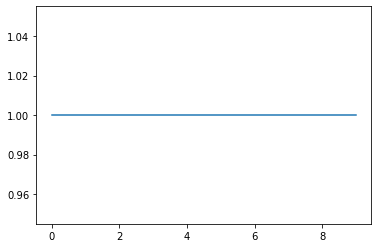

In [1]:
from userModel import User
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt




plt.plot([1]*10)
# adam = User(1,0.1,0.1,0.9,)

import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import A2C,PPO
from RLDev import UserNoMemory,test_model,UserWMemory


In [2]:
from stable_baselines3.common.env_checker import check_env
# env = UserWMemory()
# check_env(env)
env = UserNoMemory()
check_env(env)

In [3]:
from stable_baselines3.common.callbacks import BaseCallback,EvalCallback
eval_callback = EvalCallback(env, best_model_save_path='./logs_sum/',
                             log_path='./logs_sum/', eval_freq=1000,
                             deterministic=True, render=False)

from sb3_contrib import RecurrentPPO

model = RecurrentPPO("MlpLstmPolicy",env,verbose=0,seed=19,ent_coef=0.001,learning_rate=0.0003)
model.learn(total_timesteps=100000,callback=eval_callback)

C:\Users\dalyy\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-959.63 +/- 13.56
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-902.07 +/- 57.80
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-901.50 +/- 83.12
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-854.29 +/- 93.25
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-768.84 +/- 366.22
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-901.52 +/- 90.51
Episode length: 999.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-890.27 +/- 30.02
Episode length: 999.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-798.02 +/- 216.02
Episode length: 999.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-606.84 +/- 349.83
Episode length: 999.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-695.37 +/- 29

In [4]:
model = RecurrentPPO.load("./logs_sum/best_model.zip",env =env, print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.22621-SP0 10.0.22621
- Python: 3.9.12
- Stable-Baselines3: 2.0.0
- PyTorch: 2.0.1+cpu
- GPU Enabled: False
- Numpy: 1.25.1
- Cloudpickle: 2.0.0
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.22621-SP0 10.0.22621
- Python: 3.9.12
- Stable-Baselines3: 2.0.0
- PyTorch: 2.0.1+cpu
- GPU Enabled: False
- Numpy: 1.25.1
- Cloudpickle: 2.0.0
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:09<00:00,  1.90s/it]


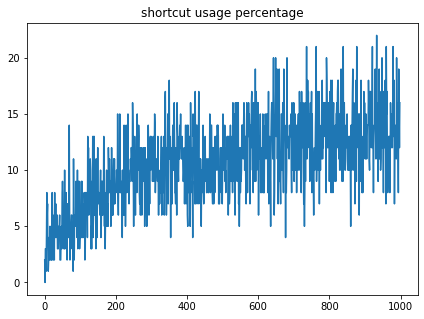

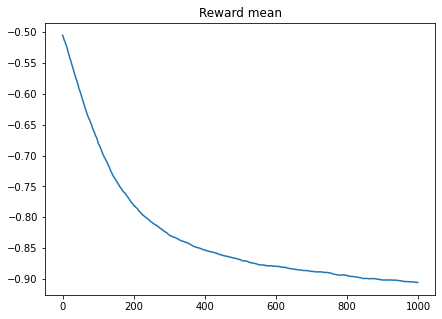

{'actions_avg': 958.43, 'action_std': 5.671428391507734, 'reward_mean': -0.8290754270152347, 'shortcut_use': 14.5, 'shortcut_std': 3.4132096331752027, 'adv': 0.9056776611154053, 'mem': 2.4029273239450717, 'mem_std': 1.6785618637854245}


{'actions_avg': 958.43,
 'action_std': 5.671428391507734,
 'reward_mean': -0.8290754270152347,
 'shortcut_use': 14.5,
 'shortcut_std': 3.4132096331752027,
 'adv': 0.9056776611154053,
 'mem': 2.4029273239450717,
 'mem_std': 1.6785618637854245}

In [5]:
test_model(model)